In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

In [2]:
# read glade v2.4 catalog
fname = "/Users/deda/Documents/Research/GW/2025CUHK/GLADE_2.4.txt"

raw = np.genfromtxt(
    fname,
    dtype=str,
    comments="#",    
    invalid_raise=False
)

print(raw.shape)   

(3263611, 22)


In [3]:
ra_str  = raw[:, 6]   # 0-based index: col 8 -> index 7
dec_str = raw[:, 7]   # col 9
dist_str = raw[:, 8]  # col 10
z_str   = raw[:, 10]  # col 12

# Convert to float, handling missing values ('None', '')
def to_float(arr, bad_values=('None', '', 'null')):
    arr = np.asarray(arr, dtype=str)
    out = np.full(arr.shape, np.nan, dtype=float)
    mask = np.ones(arr.shape, dtype=bool)
    for bad in bad_values:
        mask &= (arr != bad)
    # only convert “good” strings
    out[mask] = arr[mask].astype(float)
    return out

ra_deg  = to_float(ra_str)
dec_deg = to_float(dec_str)
dist_Mpc = to_float(dist_str)
z       = to_float(z_str)

print("Loaded:", len(ra_deg), "rows")
print("Example:", ra_deg[:3], dec_deg[:3], z[:3])

Loaded: 3263611 rows
Example: [192.721451 188.860123 267.360474] [41.120152 14.49632  70.144341] [0.00099057 0.00411957 0.00099981]


In [4]:
# convert to radians for plotting
ra_rad  = np.deg2rad(ra_deg)
dec_rad = np.deg2rad(dec_deg)# Wrap RA around 180° and flip so RA increases to the left (sky convention)
ra_wrapped = np.remainder(ra_rad + np.pi, 2 * np.pi) - np.pi
ra_wrapped = -ra_wrapped

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.grid': True,
    'grid.alpha': 0.3,
})


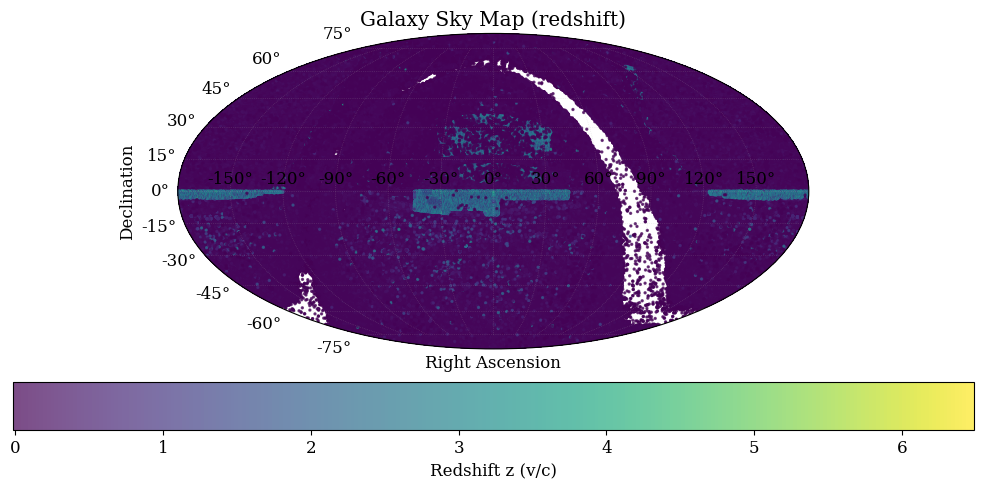

In [6]:
# Plot sky map with redshift colour coding
# Simple plot
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="mollweide")

sc = ax.scatter(ra_wrapped, dec_rad, c=z, s=2, alpha=0.7)

ax.grid(True, linestyle=":", linewidth=0.5)
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("Galaxy Sky Map (redshift)")

cbar = plt.colorbar(sc, ax=ax, orientation="horizontal", pad=0.08)
cbar.set_label("Redshift z (v/c)")

plt.tight_layout()
# plt.savefig('galaxy.png', dpi=300)
plt.show()


In [7]:
# Convert RA/Dec to Galactic coordinates
from astropy.coordinates import SkyCoord
import astropy.units as u

# Create SkyCoord object and convert to galactic
coords = SkyCoord(ra=ra_deg * u.deg, dec=dec_deg * u.deg, frame="icrs")
l_gal = coords.galactic.l.wrap_at(180 * u.deg).radian  # Galactic longitude, wrapped at 180°
b_gal = coords.galactic.b.radian                        # Galactic latitude


# Wrap longitude for proper mollweide projection
l_wrapped = np.remainder(l_gal + np.pi, 2 * np.pi) - np.pi
l_wrapped = -l_wrapped  # Flip so longitude increases to the left



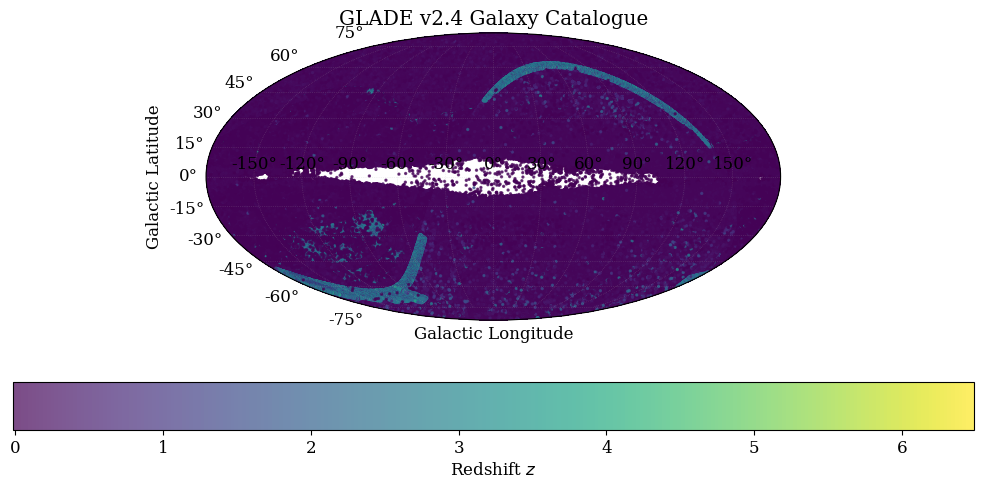

In [9]:

# Plot in galactic coordinates
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="mollweide")

sc = ax.scatter(l_wrapped, b_gal, c=z, s=2, alpha=0.7)

ax.grid(True, linestyle=":", linewidth=0.5)
ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")
ax.set_title("GLADE v2.4 Galaxy Catalogue")

cbar = plt.colorbar(sc, ax=ax, orientation="horizontal")
cbar.set_label(r"Redshift $z$")

plt.tight_layout()
plt.savefig('galaxy_plot.png',dpi=300, bbox_inches='tight')
plt.show()